In [1]:
from library_parser import *
%matplotlib inline

In [2]:
N_file = '/nfs/scistore08/kondrgrp/eputints/Jupyter/GFP_global/Illumina_MiSeq/data/4_consensus_sqs/2_matched_barcodes/N_half.fastq'
C_file = '/nfs/scistore08/kondrgrp/eputints/Jupyter/GFP_global/Illumina_MiSeq/data/4_consensus_sqs/2_matched_barcodes/C_half.fastq'

N_start_pattern = 'ATGAGCA'
N_end_pattern = 'ACTGGTGAAC'
C_start_pattern = 'GTGAACCGCA'
C_end_pattern = 'CCTAGGAACA'

link_sq = 'ACTG'

N_sq_length = 353
C_sq_length = 372

refseq = 'ATGAGCAAGGGCGAGGAGCTGTTCACCGGGATCGTGCCCGTCCTGATTGAGCTGGACGGCGACGTACACGGCCACAAGTTCAGCGTGCGCGGCGAGGGCGAGGGCGATGCCGACTACGGCAAGCTGGAGATCAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGTCGTACGGCATTTTGTGCTTCGCGCGCTACCCCGAACACATGAAGATGAACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACATCCAGGAGCGCACCATCTTCTTCCAGGACGACGGCAAGTACAAGACCCGTGGGGAGGTGAAGTTCGAGGGCGACACACTGGTGAACCGCATCGAGCTGAAGGGCATGGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTTTAACAGCCACAACGTCTATATCATGCCAGACAAGGCTAATAACGGCCTGAAGGTGAACTTCAAGATCCGCCACAACATCGAGGGCGGCGGGGTGCAGCTCGCCGACCACTACCAGACGAACGTTCCCTTGGGCGACGGCCCCGTGCTGATCCCCATCAACCACTACCTGAGCTGTCAGACAGCCATCAGCAAAGACCGTAACGAGACTCGCGATCACATGGTCTTTCTGGAGTTCTTTAGTGCCTGTGGGCATACTCACGGCATGGACGAGCTGTACAAGTGATGATGAGCGGCG'

In [3]:
N_library = import_library(N_file, N_start_pattern, N_end_pattern, N_sq_length)


Loading the file

Parsing the library
This library size is 161309 mutants

Trimming sequences from the beginning

Trimming sequences from the end

Filtering sequences by length

----
Before filtering we had 161309 mutants.
Now we have 142913 mutants left.


In [4]:
C_library = import_library(C_file, C_start_pattern, C_end_pattern, C_sq_length)


Loading the file

Parsing the library
This library size is 161309 mutants

Trimming sequences from the beginning

Trimming sequences from the end

Filtering sequences by length

----
Before filtering we had 161309 mutants.
Now we have 144293 mutants left.


In [5]:
library = N_library

In [6]:
C_library.barcodes = [x.bc for x in C_library.sequences]
N_library.barcodes = [x.bc for x in N_library.sequences]

In [7]:
collected = []
for ind_N, bc in enumerate(N_library.barcodes):
    if ind_N%500==0:
        print(ind_N)
    try:
        ind_C = C_library.barcodes.index(bc)
        collected.append(ind_C)
        library.sequences[ind_N].nt += (link_sq + C_library.sequences[ind_C].nt)
        library.sequences[ind_N].quality += ('~'*len(link_sq) + C_library.sequences[ind_C].quality)
        library.sequences[ind_N].bc_coverage += (':' + C_library.sequences[ind_C].bc_coverage)
        library.sequences[ind_N].length = len(library.sequences[ind_N].nt)
    except:
        pass

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
8500

In [8]:
len(collected)

133077

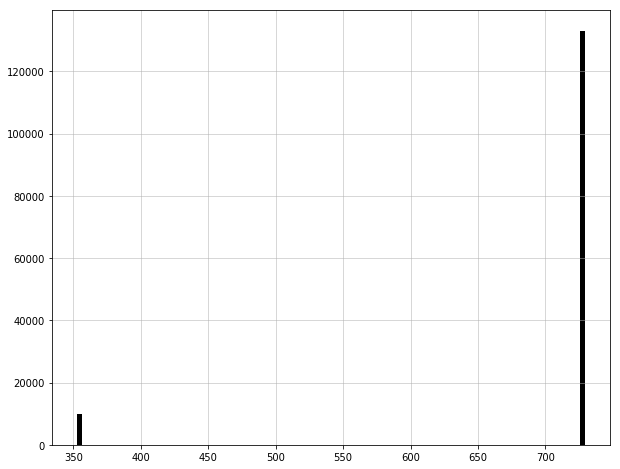

In [9]:
plt.figure(figsize=[10,8])
plt.hist([x.length for x in library.sequences], bins=100, color='k')
plt.grid(lw=0.5)

In [10]:
library.filter_by_length(len(refseq))


----
Before filtering we had 142913 mutants.
Now we have 133077 mutants left.


In [11]:
library.drop_mega_mutants(25)


----
Before filtering we had 133077 mutants.


AttributeError: 'Mutant' object has no attribute 'n_mutations'

In [ ]:
library.extract_mutations(refseq)

In [ ]:
plt.figure(figsize=[10,8])
plt.hist([sq.n_mutations for sq in library.sequences],range=(0,10),color='k',alpha=0.7)
plt.grid(lw=0.5)
plt.xlim([0,10])
plt.xlabel('Number of mutations per mutant',fontsize=17)
plt.ylabel('Number of such mutants',fontsize=17)
plt.title('Number of mutations per mutant in the library', fontsize=21)

In [ ]:
plt.figure(figsize=[10,8])
plt.boxplot([sq.n_mutations for sq in library.sequences],)
plt.grid(lw=0.5)
plt.ylim(-1,20)
plt.ylabel('Number of mutations per mutant',fontsize=17)

In [ ]:
pos = collections.Counter(flatten([sq.mutations_pos for sq in library.sequences]))

plt.figure(figsize=[20,8])
plt.xticks([x for x in range(0,740,20)])
plt.xlim(0,740)
plt.grid(lw=0.5)
plt.plot([x for x in pos.keys()],[x for x in pos.values()],'k-')
plt.xlabel('Position',fontsize=17)
plt.ylabel('Number of mutants with a mutation in this position',fontsize=17)
plt.title('Number of mutations per position', fontsize=21);

In [19]:
with open("/nfs/scistore08/kondrgrp/eputints/Jupyter/GFP_global/Illumina_MiSeq/data/5_library_ready/mutants.fasta", "w+") as f:
    for sq in library.sequences:
        f.write('>' + sq.bc + '\n' + sq.nt + '\n')